In [1]:
# Import required libraries
# requirements are
# pandas>=0.19
# scikit_learn>=0.18

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [2]:
# Read data
df = pd.read_csv('../resources/Products.csv', 
                 usecols=['Product title', 'Category', 'description', 'description-short'])

In [3]:
# Print out product' categories with theirs #occurences
df.Category.value_counts()

Home | Hobby & UnderhÃ¥llning | Radiostyrt | DrÃ¶nare                      15
Home | Hobby & UnderhÃ¥llning | Hoverboards                                 6
Home | Hemmet | Bygg | El & Elinstallation | Batterier                      5
Home | Fritid & TrÃ¤ning | TrÃ¤ning & Tillskott | Aktivitetsarmband         3
Home | Hemmet | Bygg | El & Elinstallation | Belysning | LED-Lampor E27     2
Name: Category, dtype: int64

In [4]:
# Add target column with numerical representation product' category
mapped_values = {index: value for value, index in enumerate(df.Category.unique())}

df['target'] = df.Category.map(mapped_values)

In [5]:
# Add data column with aggregated text from featured columns
# Product title, description, and description-short
df['data'] = df[['Product title', 'description', 'description-short']].apply(lambda x: ' '.join(x), axis=1)

In [7]:
# Split dataset into train and test sets (80/20)
df_train, df_test = train_test_split(df, test_size = 0.2)

# Create vector representation of text "Bag of words"
vectorizer = TfidfVectorizer(sublinear_tf=True, 
                             max_df=0.5,
                             stop_words='english')

# Calculate TFIDF scores for tokens in product' data description
# for both train and test sets
X_train = vectorizer.fit_transform(df_train.data.as_matrix())
X_test = vectorizer.transform(df_test.data.as_matrix())

# Create train and test labels for classifier
y_train, y_test = df_train.target, df_test.target

# Create Multinomial Naive Bayes model (can be changed by anyoneelse model)
clf = MultinomialNB(alpha=.01)

# Train model
clf.fit(X_train, y_train)

# Get predicted values from pretrainded model
pred = clf.predict(X_test)

# Print out model' evaluation metrics (confusion matrix and precision/recall/f1-score)
print(metrics.classification_report(y_test, pred))
print(metrics.confusion_matrix(y_test, pred))

# metrics.accuracy_score(y_test, pred)

             precision    recall  f1-score   support

          2       1.00      1.00      1.00         1
          3       1.00      1.00      1.00         5
          4       1.00      1.00      1.00         1

avg / total       1.00      1.00      1.00         7

[[1 0 0]
 [0 5 0]
 [0 0 1]]


In [8]:
# Print out test product with predicted product' categories
# Category - text representation of product' category
# target - numerical representation of an actual product' category
# predicted - numerical representation of an predicted product' category
df_test['predicted'] = pred
df_test.copy()

/Users/alex/Envs/matching/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Product title,Category,description,description-short,target,data,predicted
20,Parrot Bebop Drone 2 Vit/Svart,Home | Hobby & UnderhÃ¥llning | Radiostyrt | D...,<p>Ett tillbehÃ¶r med perfekt passform och til...,Parrot Bebop Drone 2 Vit/Svart,3,Parrot Bebop Drone 2 Vit/Svart <p>Ett tillbehÃ...,3
22,Parrot Bebop 2 Skycontroller Vit/Sv,Home | Hobby & UnderhÃ¥llning | Radiostyrt | D...,<p>Ett tillbehÃ¶r med perfekt passform och til...,Parrot Bebop 2 SkyController Vit/Sv,3,Parrot Bebop 2 Skycontroller Vit/Sv <p>Ett til...,3
26,"Denver Hoverboard 6,5"" Vit",Home | Hobby & UnderhÃ¥llning | Hoverboards,"<p><strong>Motoriserad balans-brÃ¤da, HoverBoa...","Denver HoverBoard 6,5"" Vit",4,"Denver Hoverboard 6,5"" Vit <p><strong>Motorise...",4
15,Parrot Bebop & Skycontroller BlÃ¥,Home | Hobby & UnderhÃ¥llning | Radiostyrt | D...,<p>Byggd med sÃ¤kerhet i Ã¥tanke<br />Den fjÃ¤...,Parrot Bebop &amp;amp; Skycontroller BlÃ¥,3,Parrot Bebop & Skycontroller BlÃ¥ <p>Byggd med...,3
18,Parrot Bebop Drone Gul,Home | Hobby & UnderhÃ¥llning | Radiostyrt | D...,<p>Byggd med sÃ¤kerhet i Ã¥tanke<br />Den fjÃ¤...,Parrot Bebop Drone Gul,3,Parrot Bebop Drone Gul <p>Byggd med sÃ¤kerhet ...,3
6,Belkin Wemo Led Starterkit 2X E27 Bulbs + Wemo...,Home | Hemmet | Bygg | El & Elinstallation | B...,"<font size=""2"">â€‹</font>Med WeMo-startpaketet...",BELKIN WEMO LED STARTERKIT 2x E27 BULBS + WEMO...,2,Belkin Wemo Led Starterkit 2X E27 Bulbs + Wemo...,2
16,Parrot Bebop & Skycontroller RÃ¶d,Home | Hobby & UnderhÃ¥llning | Radiostyrt | D...,<p>Byggd med sÃ¤kerhet i Ã¥tanke<br />Den fjÃ¤...,Parrot Bebop &amp;amp; Skycontroller RÃ¶d,3,Parrot Bebop & Skycontroller RÃ¶d <p>Byggd med...,3


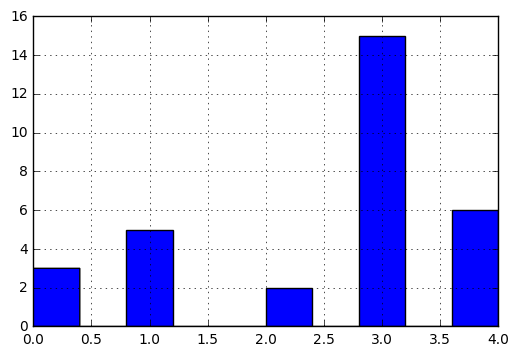

In [10]:
%matplotlib inline

df.target.hist()